In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
import os
import numpy as np
import sigpy as sp
import sigpy.plot as pl
from cmcrameri import cm

from dipy.segment.mask import median_otsu
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs
import numpy as np
import nrrd
import scikit_posthocs as sp

import sys
sys.path.append("/home/ahannum/Documents/Phase/cDTI_python")
from mystic_mrpy.Data_Import.Diffusion   import *
from mystic_mrpy.Data_Sorting.Diffusion  import *
from mystic_mrpy.Diffusion.DWI  import *
from mystic_mrpy.Diffusion.Gibbs         import *
from mystic_mrpy.Diffusion.Registration  import *
from mystic_mrpy.Diffusion.Rejection     import *
from mystic_mrpy.Diffusion.Respiratory   import *
from mystic_mrpy.Diffusion.Averaging     import *
from mystic_mrpy.Diffusion.Denoising     import *
from mystic_mrpy.Diffusion.Interpolation import *
from mystic_mrpy.Diffusion.Segmentation_Matrix_DTI import *
from mystic_mrpy.Diffusion.DTI import *
from mystic_mrpy.Diffusion.cDTI import *
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

# Temporal Phase Difference Map Images

In [2]:
vv = 5
volunteers=[1,2,3,4,5,7,8,9,10,11]
rep = random.randint(1,1000)

In [3]:
# Load in Mask & Magnitude image

volunteer = str(volunteers[vv])
print(volunteer, end = ' ')
inpath = '/home/ahannum/Documents/Phase/Data/V00' + volunteer 
name = inpath.split('/')
namejoin = '/'.join(name[:-1])

num = 0
for num in range(3):
    mask_end   = [_ for _ in os.listdir(inpath) if _.endswith('new.nrrd')]
    mask_end.sort()
    mask_end,header =  nrrd.read(os.path.join(inpath, mask_end[num]))
    mask = mask_end
    mask = mask.astype('float')
    mask[mask==0] = np.nan
    if num ==0:
        M0_mask = mask
    if num ==1:
        M1_mask = mask
    if num ==2:
        M2_mask = mask

savename = os.path.join(inpath,'M0_phs_boostrap.npy')
M0_adj = np.exp(1j*np.load(savename))[:,:,:,:,rep,:]

savename = os.path.join(inpath,'M1_phs_boostrap.npy')
M1_adj = np.exp(1j*np.load(savename))[:,:,:,:,rep,:]

savename = os.path.join(inpath,'M2_phs_boostrap.npy')
M2_adj = np.exp(1j*np.load(savename))[:,:,:,:,rep,:]


savename = os.path.join(inpath,'M0_std_boostrap_bg.npy')
M0_std = np.load(savename)[:,:,:,:,rep]

savename = os.path.join(inpath,'M1_std_boostrap_bg.npy')
M1_std = np.load(savename)[:,:,:,:,rep]

savename = os.path.join(inpath,'M2_std_boostrap_bg.npy')
M2_std = np.load(savename)[:,:,:,:,rep]



7 

In [5]:
import random
sl = 3
diffusion = -1
rep = 0


Volunteer 5 sl 3


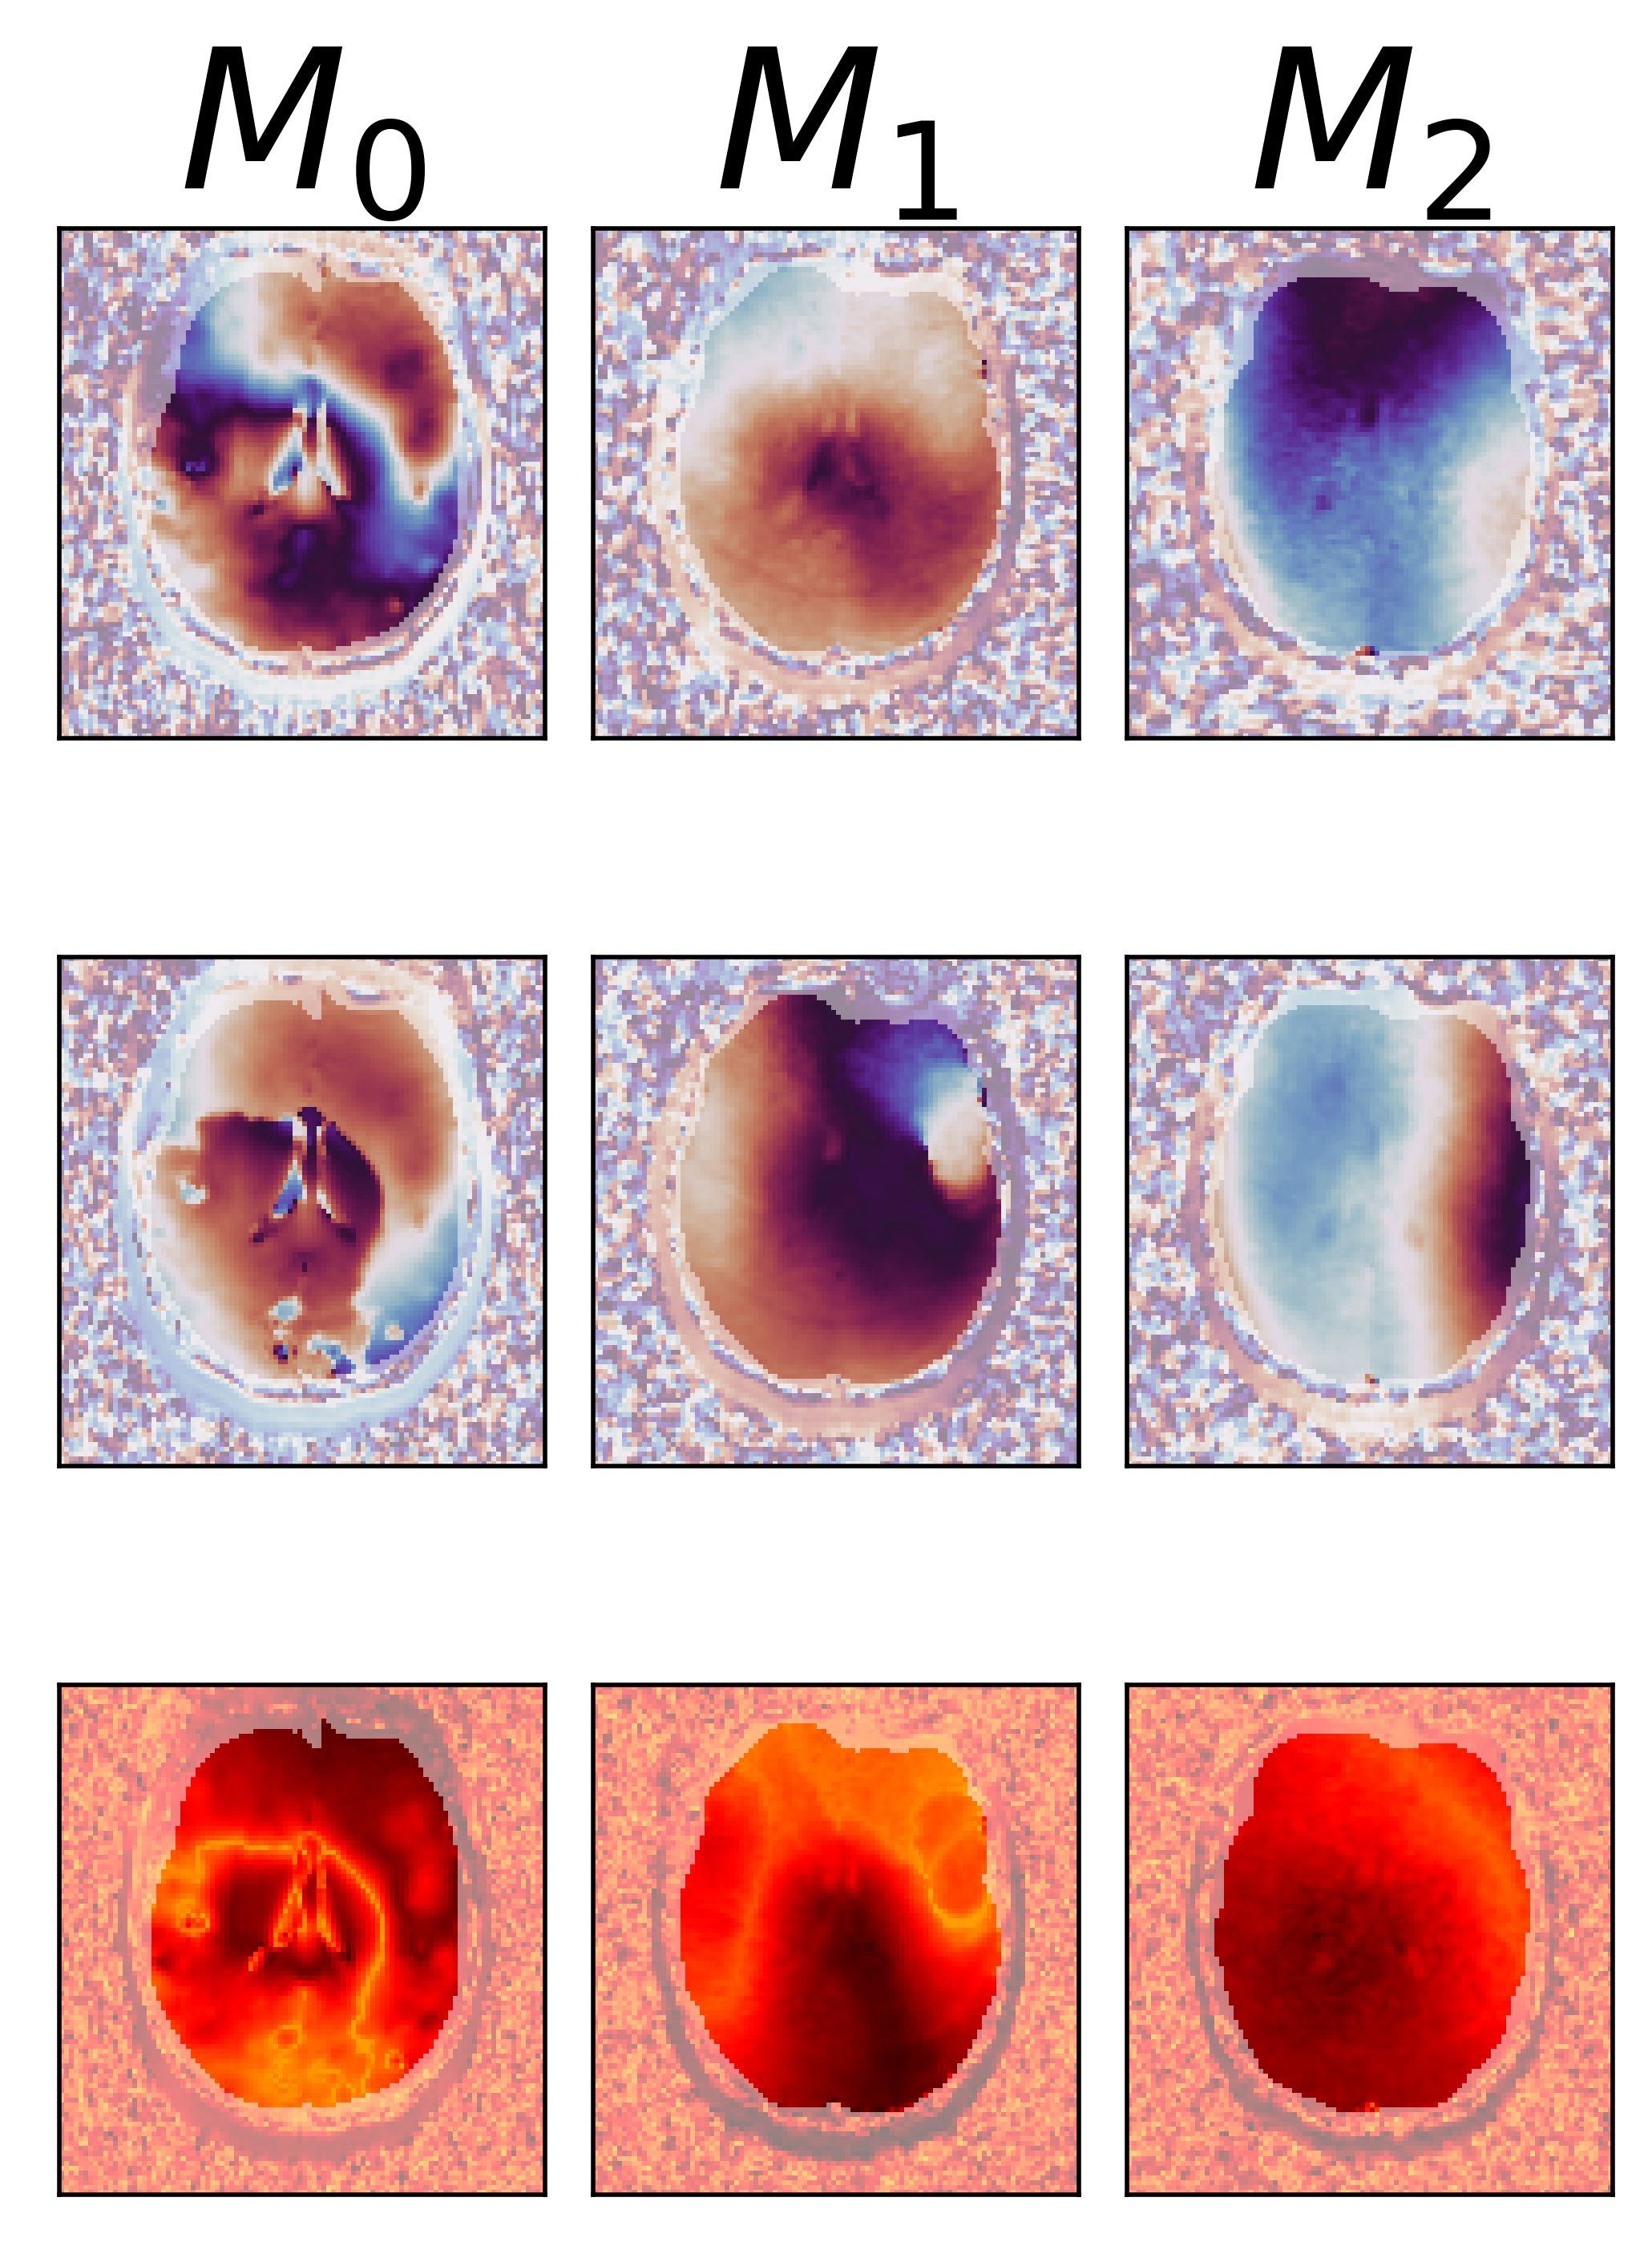

In [7]:
# Horizontal Fig 

print('Volunteer',vv,'sl',sl)
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(5,7), dpi=500)

w1 = 15
w2 = 120
l1= 15
l2 = 115


######### 1 rep phase Phase
phs_m0 = (np.angle(M0_adj))
phs_m1 = (np.angle(M1_adj))
phs_m2 = (np.angle(M2_adj))
axes[0,0].imshow(phs_m0[w1:w2,l1:l2,sl,diffusion,rep],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',alpha = 0.5,interpolation = 'nearest')
axes[0,1].imshow(phs_m1[w1:w2,l1:l2,sl,diffusion,rep,],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',alpha = 0.5,interpolation = 'nearest')
im2=axes[0,2].imshow(phs_m2[w1:w2,l1:l2,sl,diffusion,rep],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',alpha = 0.5,interpolation = 'nearest')

phs_m0 = np.angle((M0_adj))* M0_mask[:,:,:,np.newaxis,np.newaxis]
phs_m1 = np.angle((M1_adj))* M1_mask[:,:,:,np.newaxis,np.newaxis]
phs_m2 = np.angle((M2_adj)) * M2_mask[:,:,:,np.newaxis,np.newaxis]
axes[0,0].imshow(phs_m0[w1:w2,l1:l2,sl,diffusion,rep],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',interpolation = 'nearest')
axes[0,1].imshow(phs_m1[w1:w2,l1:l2,sl,diffusion,rep],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',interpolation = 'nearest')
im4=axes[0,2].imshow(phs_m2[w1:w2,l1:l2,sl,diffusion,rep],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',interpolation = 'nearest')
#axes[0,0].imshow(get_edge(np.nan_to_num(M0_mask[w1:w2,l1:l2,sl,diffusion,0])),vmin = 0,vmax = 1,cmap = 'gray_r',interpolation = 'nearest')
#axes[0,1].imshow(get_edge(np.nan_to_num(M1_mask[w1:w2,l1:l2,sl,diffusion,0])),vmin = 0,vmax = 1,cmap = 'gray_r',interpolation = 'nearest')
#axes[0,2].imshow(get_edge(np.nan_to_num(M2_mask[w1:w2,l1:l2,sl,diffusion,0])),vmin = 0,vmax = 1,cmap = 'gray_r',interpolation = 'nearest')


######### Average Phase
phs_m0 = np.angle(np.nanmean(M0_adj,axis = -1))
phs_m1 = np.angle(np.nanmean(M1_adj,axis = -1))
phs_m2 = np.angle(np.nanmean(M2_adj,axis = -1))
axes[1,0].imshow(phs_m0[w1:w2,l1:l2,sl,diffusion],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',alpha = 0.5,interpolation = 'nearest')
axes[1,1].imshow(phs_m1[w1:w2,l1:l2,sl,diffusion],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',alpha = 0.5,interpolation = 'nearest')
im2=axes[1,2].imshow(phs_m2[w1:w2,l1:l2,sl,diffusion],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',alpha = 0.5,interpolation = 'nearest')

phs_m0 = np.angle(np.nanmean(M0_adj,axis = -1))[:,:,:,:,np.newaxis] * M0_mask[:,:,:,np.newaxis,np.newaxis]
phs_m1 = np.angle(np.nanmean(M1_adj,axis = -1))[:,:,:,:,np.newaxis] * M1_mask[:,:,:,np.newaxis,np.newaxis]
phs_m2 = np.angle(np.nanmean(M2_adj,axis = -1))[:,:,:,:,np.newaxis] * M2_mask[:,:,:,np.newaxis,np.newaxis]
axes[1,0].imshow(phs_m0[w1:w2,l1:l2,sl,diffusion,rep],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',interpolation = 'nearest')
axes[1,1].imshow(phs_m1[w1:w2,l1:l2,sl,diffusion,rep,],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',interpolation = 'nearest')
im4=axes[1,2].imshow(phs_m2[w1:w2,l1:l2,sl,diffusion,rep,],vmin = -math.pi,vmax = math.pi,cmap = 'twilight',interpolation = 'nearest')
#axes[1,0].imshow(get_edge(np.nan_to_num(M0_mask[w1:w2,l1:l2,sl,diffusion,0,])),vmin = 0,vmax = 1,cmap = 'gray_r',interpolation = 'nearest')
#axes[1,1].imshow(get_edge(np.nan_to_num(M1_mask[w1:w2,l1:l2,sl,diffusion,0,])),vmin = 0,vmax = 1,cmap = 'gray_r',interpolation = 'nearest')
#axes[1,2].imshow(get_edge(np.nan_to_num(M2_mask[w1:w2,l1:l2,sl,diffusion,0,])),vmin = 0,vmax = 1,cmap = 'gray_r',interpolation = 'nearest')



######### STandard Deviation 
phs_m0 = (M0_std) #* M0_mask[:,:,:,diffusion,0,:]
phs_m1 = (M1_std) #* M1_mask[:,:,:,diffusion,0,:]
phs_m2 = (M2_std) #* M2_mask[:,:,:,diffusion,0,:] 
axes[2,0].imshow(phs_m0[w1:w2,l1:l2,sl,diffusion,],vmin = 0,vmax = math.pi,cmap = 'hot',alpha = 0.5,interpolation = 'nearest')
axes[2,1].imshow(phs_m1[w1:w2,l1:l2,sl,diffusion,],vmin = 0,vmax = math.pi,cmap = 'hot',alpha = 0.5,interpolation = 'nearest')
im2=axes[2,2].imshow(phs_m2[w1:w2,l1:l2,sl,diffusion],vmin = 0,vmax = math.pi,cmap = 'hot',alpha = 0.5,interpolation = 'nearest')

phs_m0 = (M0_std[:,:,:,:,np.newaxis]) * M0_mask[:,:,:,np.newaxis,np.newaxis]
phs_m1 = (M1_std[:,:,:,:,np.newaxis]) * M1_mask[:,:,:,np.newaxis,np.newaxis]
phs_m2 = (M2_std[:,:,:,:,np.newaxis]) * M2_mask[:,:,:,np.newaxis,np.newaxis]
axes[2,0].imshow(phs_m0[w1:w2,l1:l2,sl,diffusion,0,],vmin = 0,vmax = math.pi,cmap = 'hot',interpolation = 'nearest')
axes[2,1].imshow(phs_m1[w1:w2,l1:l2,sl,diffusion,0,],vmin = 0,vmax = math.pi,cmap = 'hot',interpolation = 'nearest')
im4=axes[2,2].imshow(phs_m2[w1:w2,l1:l2,sl,diffusion,0,],vmin = 0,vmax = math.pi,cmap = 'hot',interpolation = 'nearest')
#axes[3,0].imshow(get_edge(np.nan_to_num(M0_mask[w1:w2,l1:l2,sl,diffusion,0,])),vmin = 0,vmax = 1,cmap = 'gray_r',interpolation = 'nearest')
#axes[3,1].imshow(get_edge(np.nan_to_num(M1_mask[w1:w2,l1:l2,sl,diffusion,0,])),vmin = 0,vmax = 1,cmap = 'gray_r',interpolation = 'nearest')
#axes[3,2].imshow(get_edge(np.nan_to_num(M2_mask[w1:w2,l1:l2,sl,diffusion,0,])),vmin = 0,vmax = 1,cmap = 'gray_r',interpolation = 'nearest')



######### Settings
axes[0,0].set_title('$M_0$',size = 35,rotation = 0)
axes[0,1].set_title('$M_1$',size = 35,rotation = 0)
axes[0,2].set_title('$M_2$',size = 35,rotation = 0)



for m in range(3):
    for j in range(3):
        axes[m, j].get_xaxis().set_ticks([])
        axes[m, j].get_yaxis().set_ticks([])

plt.subplots_adjust(wspace=0.1, hspace=0.1)   
plt.show()

In [ ]:
M0_adj.shape

(128, 128, 6, 4, 5)

In [4]:
data.shape

(128, 128, 6, 4, 40)